In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, BatchNormalization, Activation, Dropout, Input, MaxPool2D, Conv2D
from keras.models import Model
from keras.metrics import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from IPython.display import clear_output
clear_output()
import os

# Import Data

In [2]:
path1 = "C:\\Users\\91828\\Documents\\DL\\Roses_single\\"
roses = os.listdir(path1)
path2 = "C:\\Users\\91828\\Documents\\DL\\Tulips_single\\"
tulips = os.listdir(path2)

In [3]:
print(f"Number of Rose images: {len(roses)}\nNumber of Tulip images: {len(tulips)}")

Number of Rose images: 145
Number of Tulip images: 197


In [4]:
img = cv2.imread(path1+roses[0])
img = cv2.resize(img, (224,224), cv2.INTER_LINEAR)

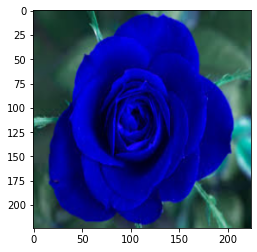

In [5]:
plt.imshow(img)
plt.show()

In [6]:
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray_image.shape
# plt.imshow(gray_image, cmap="Greys")
# plt.show()

In [7]:
# u,s,v = np.linalg.svd(gray_image)
# var_explained = np.round(s**2/np.sum(s**2), decimals=3)
# fig, ax = plt.subplots(figsize=(12,8))
# sns.barplot(x=list(range(1,51)),
#             y=var_explained[0:50], color="dodgerblue", ax=ax)
# plt.xlabel('Singular Vector', fontsize=16)
# plt.ylabel('Variance Explained', fontsize=16)

In [8]:
# num_components = 20
# reconst_img_10 = np.matrix(u[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(v[:num_components, :])
# plt.imshow(reconst_img_10, cmap='Greys')
# plt.show()

In [9]:
# images = []
# for file in roses:
#     img = cv2.imread(path1+file)
#     img = cv2.resize(img, (224,224), cv2.INTER_LINEAR)
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     u, s, v = np.linalg.svd(gray_img)
#     reconst_img_10 = np.matrix(u[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(v[:num_components, :])
#     images.append(np.asarray(reconst_img_10).reshape(-1,224,224,1))
# for file in tulips:
#     img = cv2.imread(path2+file)
#     img = cv2.resize(img, (224,224), cv2.INTER_LINEAR)
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     u, s, v = np.linalg.svd(gray_img)
#     reconst_img_10 = np.matrix(u[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(v[:num_components, :])
#     images.append(np.asarray(reconst_img_10).reshape(-1,224,224,1))

# Process the data

## Resize the images:

In [10]:
images = []
for file in roses:
    img = cv2.imread(path1+file)
    img = cv2.resize(img, (100,100), cv2.INTER_LINEAR)
    images.append(img)
for file in tulips:
    img = cv2.imread(path2+file)
    img = cv2.resize(img, (100,100), cv2.INTER_LINEAR)
    images.append(img)

In [11]:
print(f"Total number of images: {len(images)}\nShape of each image: {images[0].shape}")

Total number of images: 342
Shape of each image: (100, 100, 3)


## Concatenate the resized images in a list

In [12]:
X = np.asarray(images, dtype='float32')
y = np.array([0]*len(roses)+[1]*len(tulips))

## Convert the labels into categorical variables

In [13]:
labels = keras.utils.to_categorical(y)

In [14]:
# X_new = np.ndarray(shape = (X.shape[0],X.shape[1],X.shape[2],3), dtype='uint8')
# X_new[:,:,:,0] = X[:,:,:,0]
# X_new[:,:,:,1] = X[:,:,:,0]
# X_new[:,:,:,2] = X[:,:,:,0]
# X_new.shape

## Split the processed data into train set and test set. Further split the train set data into train set and validation set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=123)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [16]:
X_tr.shape

(192, 100, 100, 3)

In [17]:
Batch_size=16
Epochs=30

# Build the Models
## CNN Network:

In [18]:
K.clear_session()
inp = Input(shape=(100,100,3),dtype=np.float32)
x = Conv2D(16, kernel_size=3, activation='relu', padding='valid')(inp)
x = MaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, kernel_size=3, activation='relu', padding='valid')(inp)
x = MaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Conv2D(64, kernel_size=3, activation='relu', padding='valid')(inp)
x = MaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model(inp,out)
clear_output()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 49, 49, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 49, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 153664)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4917280   
__________

### Compile the model

In [19]:
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model on the train data

In [20]:
hist = model.fit(x=X_train, y=y_train, batch_size=Batch_size, epochs=Epochs, validation_split=0.25, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Get the predictions and classification report

In [21]:
predictions = model.predict(x=X_test.astype("float32"), batch_size=Batch_size)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        34
           1       0.74      0.96      0.83        52

    accuracy                           0.77        86
   macro avg       0.81      0.72      0.72        86
weighted avg       0.80      0.77      0.75        86



### Check for overfitting or underfitting

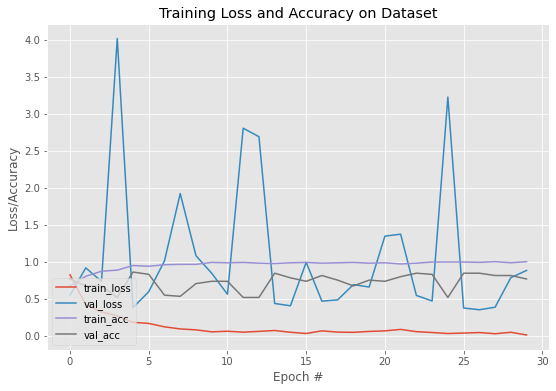

In [22]:
N = np.arange(0, Epochs)
plt.style.use("ggplot")
plt.figure(figsize=(9,6))
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.plot(N, hist.history["acc"], label="train_acc")
plt.plot(N, hist.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

plt.show()

### Observation:

We observe that the mean accuracy of image classification is still low, with the recall for the 'Rose' class being much lower than required. So, we try to increase the input data, with more variations induced by using Data Augmentation.

## Data Augmentation

### Initialize Data Generator and fit the above CNN model on the augmented data:

In [23]:
datagenr = ImageDataGenerator(zoom_range=0.15,
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.15,
                              fill_mode="nearest",
                              horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:
hist = model.fit_generator(datagenr.flow(X_tr, y_tr, batch_size=Batch_size),
                           validation_data=(X_val, y_val),
                           steps_per_epoch=Epochs//2,
                           epochs=Epochs,verbose=0)

### Make predictions and check the Classification Report

In [24]:
predictions = model.predict(x=X_test.astype("float32"), batch_size=Batch_size)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        34
           1       0.82      0.90      0.86        52

    accuracy                           0.83        86
   macro avg       0.83      0.80      0.81        86
weighted avg       0.83      0.83      0.82        86



### Observations:

We observe that the recall of "Rose" class (class 0) has significantly improved, and so has the average accuracy of the same model we used last, but with a new set of augmented data.

But question is whether we can do more. So, in the end we take help of an already trained **VGG19** model.

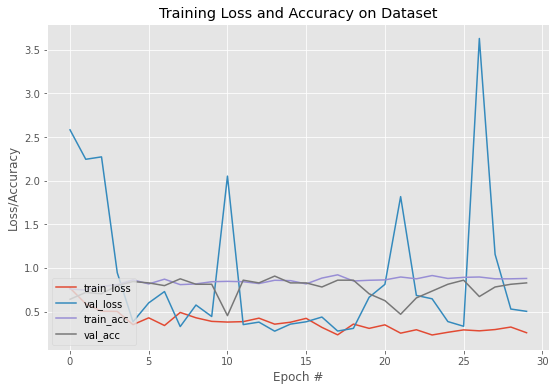

In [25]:
N = np.arange(0, Epochs)
plt.style.use("ggplot")
plt.figure(figsize=(9,6))
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.plot(N, hist.history["acc"], label="train_acc")
plt.plot(N, hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])
plt.show()

## Transfer Learning
### Import the model

In [26]:
from keras.applications import VGG19

### Disable the output layer and re-assign the input tensor shape

In [27]:
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

### Make the layers of the imported model non-trainable
We don't want to train the model again and re-assign the weights, we want to keep the trained model's weights as they are

In [28]:
for layer in base_model.layers:
    layer.trainable= False

### Add **dense** layers after the Convolutional layers in the model 

In [29]:
# K.clear_session()
y1 = base_model.output
y1 = Flatten()(y1)
y1 = Dense(64,activation='relu')(y1)
y1 = BatchNormalization()(y1)
y1 = Dense(32, activation='relu')(y1)
y1 = Dense(2, activation='softmax')(y1)
model2 = Model(base_model.input, y1)
model2.summary()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

### Fit the re-structured model on our training data

In [30]:
hist = model2.fit(x=X_train, y=y_train, batch_size=Batch_size, epochs=Epochs, validation_split=0.25, verbose=0)

### Get predictions and Classification Report

In [31]:
predictions = model2.predict(x=X_test.astype("float32"), batch_size=Batch_size)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        34
           1       0.93      1.00      0.96        52

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86



### Observations:
Clearly, an already trained model has great advantage over the vanilla model we used. The mean accuracy is 95%. At the same time, the recall for our "Rose" class is as high as 0.88, while that of the "Tulip" class is 1.0 and that is the best performance so far amongst all the three models that we saw in this notebook.

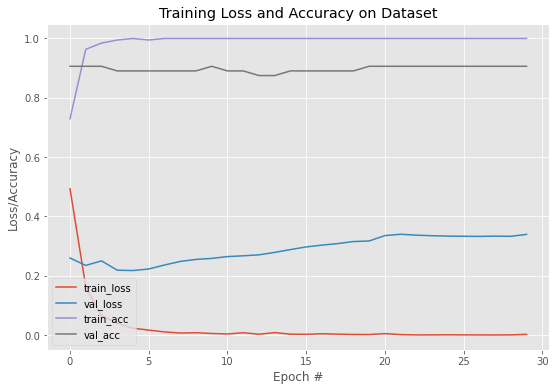

In [32]:
N = np.arange(0, Epochs)
plt.style.use("ggplot")
plt.figure(figsize=(9,6))
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.plot(N, hist.history["acc"], label="train_acc")
plt.plot(N, hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])
plt.show()